# 1. Descargamos el dataset 📥💻 

El **dataset** que utilizaremos es de **Kaggle**, un gran lugar para conseguir **datasets** para tus estudios en Ciencia de Datos e Inteligencia Artificial

El **dataset** es sobre la apreciación de ciertas variables que tienen incidencia en el **bienestar** de los países 🌎 para ser considerados _felices_ 😸 del año $2019$. Puedes descargarlo [aquí](https://www.kaggle.com/unsdsn/world-happiness) en **Kaggle**. El objetivo de este **dataset** es **estimar** qué tan cercano pueden llegar a esos resultados a ser acertados, nuestra **hipótesis** es que no sabemos apriori cómo se relacionan esas variables y de ser acertada la **hipótesis**, qué tan cierta puede llegar a ser esa **hipótesis**

# 2. Instalación de librerías y configuración inicial 👨🏻‍💻

In [ ]:
# Librerías y Dependencias

# Core
import warnings
from IPython.display import display

# Data Analysis & Data Viz
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Machine Learning
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeRegressor

# Parámetros y Métricas
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import mean_squared_error, r2_score 

In [ ]:
# Evitamos la notación científica y rendondeamos los valores a 2 dígitos después de la coma
pd.options.display.float_format = '{:.2f}'.format

# Evitamos los molestos warnings
warnings.simplefilter("ignore")

# 3. Cargamos los datos 💿💻

In [ ]:
# Cargamos nuestro dataset
url = 'https://raw.githubusercontent.com/jorge-robledo11/Datasets/main/Datasets/happiness.csv'
data = pd.read_csv(url, encoding='utf-8')
data

,country,rank,score,high,low,gdp,family,lifexp,freedom,generosity,corruption,dystopia
0,Norway,1,7.54,7.59,7.48,1.62,1.53,0.80,0.64,0.36,0.32,2.28
1,Denmark,2,7.52,7.58,7.46,1.48,1.55,0.79,0.63,0.36,0.40,2.31
2,Iceland,3,7.50,7.62,7.39,1.48,1.61,0.83,0.63,0.48,0.15,2.32
3,Switzerland,4,7.49,7.56,7.43,1.56,1.52,0.86,0.62,0.29,0.37,2.28
4,Finland,5,7.47,7.53,7.41,1.44,1.54,0.81,0.62,0.25,0.38,2.43
...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.47,3.54,3.40,0.37,0.95,0.33,0.58,0.25,0.46,0.54
151,Syria,152,3.46,3.66,3.26,0.78,0.40,0.50,0.08,0.49,0.15,1.06
152,Tanzania,153,3.35,3.46,3.24,0.51,1.04,0.36,0.39,0.35,0.07,0.62
153,Burundi,154,2.90,3.07,2.74,0.09,0.63,0.15,0.06,0.20,0.08,1.68


In [ ]:
# Transformamos los datos a lo que mejor convenga y analizaremos los features del dataset
data.convert_dtypes().dtypes

country        string
rank            Int64
score         Float64
high          Float64
low           Float64
gdp           Float64
family        Float64
lifexp        Float64
freedom       Float64
generosity    Float64
corruption    Float64
dystopia      Float64
dtype: object

In [ ]:
# Dimensiones del dataset
data.shape

(155, 12)

In [ ]:
# Observamos si hay datos nulos en alguno de nuestros features
data.isnull().sum()

country       0
rank          0
score         0
high          0
low           0
gdp           0
family        0
lifexp        0
freedom       0
generosity    0
corruption    0
dystopia      0
dtype: int64

In [ ]:
# Resumen de nuestro dataset
data.describe()

,rank,score,high,low,gdp,family,lifexp,freedom,generosity,corruption,dystopia
count,155.00,155.00,155.00,155.00,155.00,155.00,155.00,155.00,155.00,155.00,155.00
mean,78.00,5.35,5.45,5.26,0.98,1.19,0.55,0.41,0.25,0.12,1.85
std,44.89,1.13,1.12,1.15,0.42,0.29,0.24,0.15,0.13,0.10,0.50
min,1.00,2.69,2.86,2.52,0.00,0.00,0.00,0.00,0.00,0.00,0.38
25%,39.50,4.51,4.61,4.37,0.66,1.04,0.37,0.30,0.15,0.06,1.59
50%,78.00,5.28,5.37,5.19,1.06,1.25,0.61,0.44,0.23,0.09,1.83
75%,116.50,6.10,6.19,6.01,1.32,1.41,0.72,0.52,0.32,0.15,2.14
max,155.00,7.54,7.62,7.48,1.87,1.61,0.95,0.66,0.84,0.46,3.12


### Análisis del Resumen

- **count** ➜ **cantidades** de registros/observaciones de cada una de las columnas.
- **mean** ➜ la **media aritmética** total de cada una de las columnas.
- **std** ➜ la **desviación estándar** de cada una de las columnas.
- **min** ➜ el **valor mínimo** encontrado de cada una de las columnas.
- **max** ➜ el **valor máximo** encontrado de cada una de las columnas.
- Y los porcentajes corresponden a cada uno de los **quintiles** del total de cada una de las columnas.

# 4. Patrones en los datos 🔎👾

Podemos tomar como **muestra** el caso de **Colombia** 🇨🇴 para conocer cómo a través de la incidencia de algunas variables puede posicionarlo en el **ranking mundial**

In [ ]:
# Queremos conocer cómo se encuentra Colombia según la información del dataset
data[data.country == 'Colombia']

,country,rank,score,high,low,gdp,family,lifexp,freedom,generosity,corruption,dystopia
35,Colombia,36,6.36,6.45,6.26,1.07,1.40,0.60,0.48,0.15,0.05,2.62


De acuerdo con los **resultados** se encuentra posicionado en el **rank** $36$ 😮, veamos más a fondo a qué se debe...

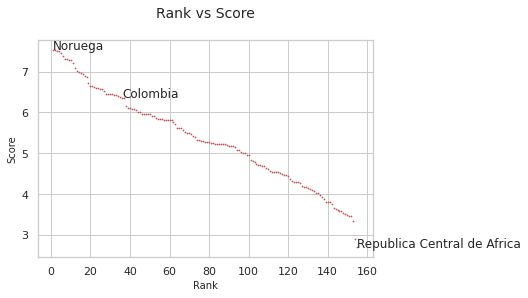

In [ ]:
# Relación entre los países con respecto al Rank y el Score
sns.set_theme(style='whitegrid')
plt.scatter(data['rank'], data['score'], linestyle='-', s=0.5, c ='r')
plt.title('Rank vs Score\n', fontsize=14)
plt.xlabel('Rank', fontsize=10)
plt.ylabel('Score', fontsize=10)
plt.text(min(data['rank']), max(data['score']), 'Noruega')
plt.text(max(data['rank']), min(data['score']), 'Republica Central de Africa')
plt.text(36, 6.36, 'Colombia');

### Análisis del Scatterplot 🔎📊

Podemos observar una relación inversamente proporcional, es decir, una alta **correlación** negativa entre el **Rank** vs el **Score**, sin embargo no es muy amplia esta información, tendremos que profundizar más a detalle

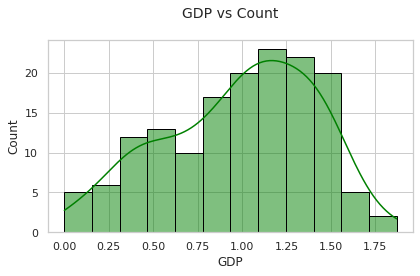

In [ ]:
# Hisplot
sns.set_theme(style="whitegrid")
sns.histplot(data=data, x='gdp', color='green', edgecolor='black', linewidth=1, kde=True, bins=12)
plt.subplot(1,1,1)
plt.title('GDP vs Count\n', fontsize=14)
plt.xlabel('GDP',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.tight_layout();

### Análisis del Histplot 🔎📊

Podemos observar que existe una **distribución normal** dentro de lo que cabe con respecto al aumento del **PIB** en la mayoría de países entre el $0.8$ y el $1.5$, además son realmente pocos los que crecen al $1.75$, podemos concluir que mientras las **economías** de sus naciones se mantengan _"saludables"_ las personas estarán _felices_ con ello, pero tendremos que buscar más información al respecto.

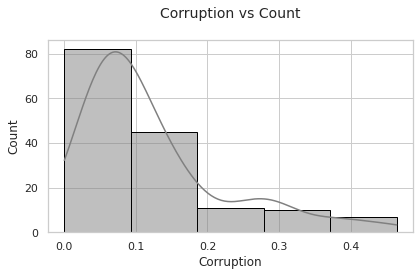

In [ ]:
# Hisplot
sns.set_theme(style="whitegrid")
sns.histplot(data=data, x='corruption', color='gray', edgecolor='black', linewidth=1, kde=True, bins=5)
plt.subplot(1,1,1)
plt.title('Corruption vs Count\n', fontsize=14)
plt.xlabel('Corruption',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.tight_layout();

### Análisis del Histplot 🔎📊

Podemos observar que con respecto a la **corrupción** existen más países alrededor del mundo en los que sus niveles de **corrupción** se encuentran muy cercanos a $0$, sin embargo esto lleva a varias preguntas y es ¿Qué tan cierto son estas estimaciones obtenidas? ¿Es más fácil de medir los niveles de **corrupción** de forma tan exacta, o serán resultados **sesgados**?

In [ ]:
# Correlation Matrix
matriz_corr = data.corr(method='spearman')

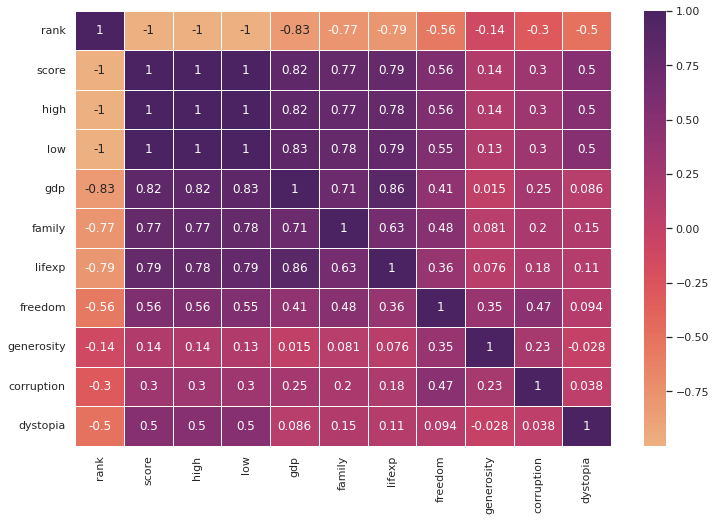

In [ ]:
# Heatmap
plt.subplots(figsize=(12,8))
sns.heatmap(matriz_corr, annot=True, linewidths=0.5, cmap=sns.color_palette("flare", as_cmap=True));

### Análisis de la Matriz de Correlación 🔢😳

Como pudimos notar algunas cosas interesantes en nuestros **features** hay **altas correlaciones** entre algunas variables, lo cuál hace más fácil de determinar algunas cosas, como por ejemplo `gdp` con respecto a `score`, tienen un estrecho vínculo, también `lifexp` con respecto `gdp`, podemos presumir que nuestros **datos** _"cumplen con las expectativas"_ de ser **datos de calidad** hasta el momento, porque hay un buen comportamiento explicativo entre los **features**

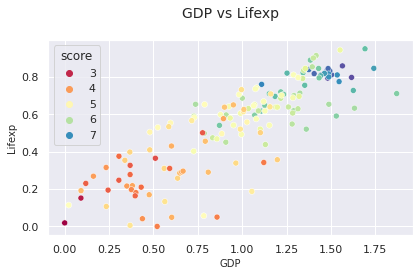

In [ ]:
# Scatterplot
sns.set_theme(style="darkgrid")
plt.subplot(1,1,1)
sns.scatterplot(data=data, x='gdp', y='lifexp', palette='Spectral', alpha=1, hue='score')
plt.title('GDP vs Lifexp\n', fontsize=14)
plt.xlabel('GDP',fontsize=10)
plt.ylabel('Lifexp',fontsize=10)
plt.tight_layout();

### Análisis del Scatterplot 📈🔍

Esto luce bastante interesante, dependiendo del crecimiento del **PIB** de la mayoría de países la **calidad de vida** es mucho mayor y esto está bien fundamentado como una **buena medida** desde el **punto de vista económico**, a mayores rentas pércapita mejor **calidad de vida** en su población y esto se puede traducir en que su población se encontrará más feliz, puesto que no tienen tantas **necesidades de primer orden**, sin embargo ¿Será qué solo esto puede ser tomado como un referente para suponer que la **renta** es el determinante qué las personas se encuentren felices? Sigamos investigando...

# 5. Procesamiento de los datos 🧑‍💻

In [ ]:
# Analizamos la columnas que queremos en nuestros features
data.columns

Index(['country', 'rank', 'score', 'high', 'low', 'gdp', 'family', 'lifexp',
       'freedom', 'generosity', 'corruption', 'dystopia'],
      dtype='object')

In [ ]:
# Definimos nuestros features y nuestro target
X = data.drop(['country','score','rank'], axis=1)
y = data['score']

Definimos nuestros **features** dejando de lado a aquellas variables que no encontramos **determinantes** para saber qué tan preciso es el estudio y como **target** el `score` que es lo que deseamos **predecir** como **output**

In [ ]:
# Dimensionamos nuestros features y target
display(X.shape)
display(y.shape)

(155, 9)

(155,)

Cómo podemos observar debe haber una concordancia entre las **dimensiones** de nuestras variables, para que no ocurran problemas más adelante, donde tenemos $155$ **registros/observaciones** y $9$ **features** contenidas en `X` y solo $155$ registros en nuestra `y`

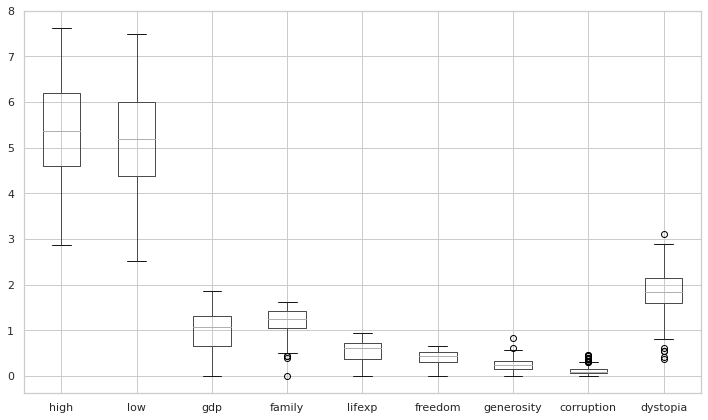

In [ ]:
# Boxplot
sns.set_theme(style="whitegrid")
plt.subplots(figsize=(10,6))
X.boxplot()
plt.tight_layout();

Podemos notar que estamos en presencia de **outliers** en algunos de nuestros **features**, sin embargo por la naturaleza de nuestro modelo tratándose de un **regresor** no es conveniente **estandarizar** o **escalar** nuestros datos. Así que haremos caso omiso por el momento, si nuestros resultados no son los _esperados_

# 6. Creamos nuestro modelo 🧠🤖

In [ ]:
# Definimos nuestro estimador
regressor = DecisionTreeRegressor()

Como bien mencionamos deseamos **estimar** unos datos y queremos saber qué tan **precisos** pueden serlo, por tal motivo usaremos un **regresor**

In [ ]:
# Grilla de Parámetros del estimador
grilla_parametros = {
        'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
        'max_depth': range(2,11),
        'max_leaf_nodes': range(2,20)
}

Deseamos **optimizar nuestros parámetros** así que usaremos una **grilla** con los **parámetros** que deseamos obtener **optimizados**

In [ ]:
# Definimos nuestra Grilla de búsqueda de parámetros y la entrenamos con nuestros features
grid_search = GridSearchCV(regressor, grilla_parametros, cv=3, n_jobs=10, scoring='neg_mean_squared_error').fit(X,y)

Veamos cuáles fueron esos **parámetros** que encontró más **óptimos** por medio de nuestra **grilla** y con **Cross Validation** haciendo validaciones más **exhaustivas**

In [ ]:
# Mejores estimadores, parámetros y predicción
display(grid_search.best_estimator_)
display(grid_search.best_params_)

DecisionTreeRegressor(max_depth=4, max_leaf_nodes=16)

{'criterion': 'squared_error', 'max_depth': 4, 'max_leaf_nodes': 16}

Utilizaremos los **parámetros** obtenidos de nuestra **grilla** para intentar **optimizar** nuestro **regresor**

# 7. Predicciones 📈📉

In [ ]:
data[(data['country'] == 'Norway') | (data['country'] == 'Colombia') | (data['country'] == 'Central African Republic')]

,country,rank,score,high,low,gdp,family,lifexp,freedom,generosity,corruption,dystopia
0,Norway,1,7.54,7.59,7.48,1.62,1.53,0.80,0.64,0.36,0.32,2.28
35,Colombia,36,6.36,6.45,6.26,1.07,1.40,0.60,0.48,0.15,0.05,2.62
154,Central African Republic,155,2.69,2.86,2.52,0.00,0.00,0.02,0.27,0.28,0.06,2.07


Utilizaremos estos países como **muestra** para analizar las **predicciones**

In [ ]:
# Los Scores obtenidos del dataset

# Norway
norway_real = y.loc[[0]].tolist()
norway_real = round(norway_real[0],3)
display(f'Score de Noruega: {norway_real}')

# Colombia
colombia_real = y.loc[[35]].tolist()
colombia_real = round(colombia_real[0],3)
display(f'Score de Colombia: {colombia_real}')

# República de África Central
rep_af_cen_real = y.loc[[154]].tolist()
rep_af_cen_real = round(rep_af_cen_real[0],3)
display(f'Score de República Centroafricana: {rep_af_cen_real}')

'Score de Noruega: 7.537'

'Score de Colombia: 6.357'

'Score de República Centroafricana: 2.693'

In [ ]:
# La predicción que encontró nuestro regresor con parámetros optmizados

# Norway
norway = grid_search.predict(X.loc[[0]]).tolist()
norway = round(norway[0],3)
display(f'Score estimado de Noruega: {norway}')

# Colombia
colombia = grid_search.predict(X.loc[[35]]).tolist()
colombia = round(colombia[0],3)
display(f'Score estimado de Colombia: {colombia}')

# República de África Central
rep_af_cen = grid_search.predict(X.loc[[154]]).tolist()
rep_af_cen = round(rep_af_cen[0],3)
display(f'Score estimado de República Centroafricana: {rep_af_cen}')

'Score estimado de Noruega: 7.484'

'Score estimado de Colombia: 6.413'

'Score estimado de República Centroafricana: 2.799'

### Análisis de las predicciones

Nuestros **resultados** fueron muy buenos, tienen realmente poca **variación** entre los valores **reales** y **predecidos**

Veámoslo con mayor claridad en un **dataframe** 

In [ ]:
# Pivot Table
paises = ['Norway','Colombia','Central African Republic']
resultados_reales = [norway_real, colombia_real, rep_af_cen_real]
resultados_est = [norway, colombia, rep_af_cen]

paquete = list(zip(paises, resultados_reales, resultados_est))

df = pd.DataFrame(paquete)
header = ['Países','Score Real','Score Estimado']
df.columns = header
df

,Países,Score Real,Score Estimado
0,Norway,7.54,7.48
1,Colombia,6.36,6.41
2,Central African Republic,2.69,2.80


# 8. Validamos nuestro modelo 🦾🤖

In [ ]:
# Definimos nuestro estimador optimizado
regressor_op = DecisionTreeRegressor(criterion='friedman_mse', max_depth=4, max_leaf_nodes=18)

**Parámetros** obtenidos por medio de nuestra **grilla**

In [ ]:
# Cross Validation sin ajustar
cross_val = cross_val_score(regressor_op, X, y, scoring='neg_mean_squared_error')
display(f'Resultado de los K-Folds sin ajustar: {cross_val}')

cross_val_abs = f'K-Folds en valor absoluto: {np.abs(np.mean(cross_val))}'
display(cross_val_abs)

'Resultado de los K-Folds sin ajustar: [-0.45531418 -0.10783508 -0.07354231 -0.11085131 -0.43323043]'

'K-Folds en valor absoluto: 0.23615466344749572'

Por la naturaleza del **dataset** y la cantidad de **datos** un buen `cv` estaría bien en $3$, porque no tenemos tantos datos para hacer **pliegues**

In [ ]:
# Si Ajustamos a 3 nuestro Cross Validation y hayamos la media en valor absoluto
cross_val = cross_val_score(regressor_op, X, y, cv=3, scoring='neg_mean_squared_error')
display(f'Resultado de los K-Folds ajustado: {cross_val}')

cross_val_abs = f'K-Folds en valor absoluto: {np.abs(np.mean(cross_val))}'
display(cross_val_abs)

'Resultado de los K-Folds ajustado: [-0.87290374 -0.18376376 -0.7384274 ]'

'K-Folds en valor absoluto: 0.5983649654888349'

Nuestro **K-Fold promediado** mejora con nuestra cantidad de $k$ 

In [ ]:
# Cross Validation & K-Fold

kf = KFold(n_splits=3, shuffle=True, random_state=25)

losses = []

for train, test in kf.split(data):
  
    print('Cada una de las iteraciones')
    display(train,test)

    X_train = X.iloc[train]
    y_train = y.iloc[train]
    X_test = X.iloc[test]
    y_test = y.iloc[test]

    # Entrenamos el modelo con nuestros datos de entrenamiento 
    regressor_op.fit(X_train, y_train)

    # Hacemos la predicción con nuestros features de prueba
    y_pred = regressor_op.predict(X_test)

    # Obtenemos cada una de las pérdidas y las almacenamos en una lista
    loss = mean_squared_error(y_test, y_pred)
    losses.append(loss)

Cada una de las iteraciones


array([  1,   2,   3,   5,   7,   9,  11,  12,  13,  14,  15,  17,  18,
        19,  22,  24,  27,  29,  30,  32,  33,  36,  37,  38,  39,  43,
        44,  45,  46,  47,  48,  50,  51,  53,  55,  56,  57,  59,  60,
        61,  62,  63,  65,  67,  68,  71,  73,  74,  76,  80,  82,  83,
        84,  85,  87,  88,  89,  90,  92,  95,  96,  98,  99, 101, 102,
       104, 105, 106, 107, 109, 110, 112, 113, 114, 115, 116, 118, 119,
       122, 123, 124, 125, 127, 128, 129, 131, 132, 134, 135, 136, 137,
       139, 141, 142, 143, 144, 145, 146, 147, 150, 151, 153, 154])

array([  0,   4,   6,   8,  10,  16,  20,  21,  23,  25,  26,  28,  31,
        34,  35,  40,  41,  42,  49,  52,  54,  58,  64,  66,  69,  70,
        72,  75,  77,  78,  79,  81,  86,  91,  93,  94,  97, 100, 103,
       108, 111, 117, 120, 121, 126, 130, 133, 138, 140, 148, 149, 152])

Cada una de las iteraciones


array([  0,   1,   2,   3,   4,   5,   6,   8,  10,  11,  14,  16,  17,
        20,  21,  22,  23,  25,  26,  28,  30,  31,  34,  35,  36,  38,
        40,  41,  42,  43,  45,  47,  48,  49,  50,  52,  54,  57,  58,
        60,  61,  62,  64,  66,  69,  70,  72,  73,  74,  75,  77,  78,
        79,  81,  83,  84,  86,  88,  89,  90,  91,  92,  93,  94,  97,
        98, 100, 101, 103, 104, 106, 107, 108, 109, 111, 112, 116, 117,
       118, 119, 120, 121, 122, 126, 129, 130, 131, 132, 133, 134, 136,
       137, 138, 139, 140, 142, 143, 145, 148, 149, 151, 152, 154])

array([  7,   9,  12,  13,  15,  18,  19,  24,  27,  29,  32,  33,  37,
        39,  44,  46,  51,  53,  55,  56,  59,  63,  65,  67,  68,  71,
        76,  80,  82,  85,  87,  95,  96,  99, 102, 105, 110, 113, 114,
       115, 123, 124, 125, 127, 128, 135, 141, 144, 146, 147, 150, 153])

Cada una de las iteraciones


array([  0,   4,   6,   7,   8,   9,  10,  12,  13,  15,  16,  18,  19,
        20,  21,  23,  24,  25,  26,  27,  28,  29,  31,  32,  33,  34,
        35,  37,  39,  40,  41,  42,  44,  46,  49,  51,  52,  53,  54,
        55,  56,  58,  59,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        72,  75,  76,  77,  78,  79,  80,  81,  82,  85,  86,  87,  91,
        93,  94,  95,  96,  97,  99, 100, 102, 103, 105, 108, 110, 111,
       113, 114, 115, 117, 120, 121, 123, 124, 125, 126, 127, 128, 130,
       133, 135, 138, 140, 141, 144, 146, 147, 148, 149, 150, 152, 153])

array([  1,   2,   3,   5,  11,  14,  17,  22,  30,  36,  38,  43,  45,
        47,  48,  50,  57,  60,  61,  62,  73,  74,  83,  84,  88,  89,
        90,  92,  98, 101, 104, 106, 107, 109, 112, 116, 118, 119, 122,
       129, 131, 132, 134, 136, 137, 139, 142, 143, 145, 151, 154])

Veamos las **predicciones** de nuestro **regresor** pero ahora con los **datos de prueba** del **dataset**

In [ ]:
# Realizamos la predicción con nuestros features de prueba
print('\t\t\tValores Predecidos')
display(y_pred)

			Valores Predecidos


array([7.34528569, 7.34528569, 7.34528569, 7.34528569, 6.96025002,
       6.96025002, 6.96025002, 6.61562502, 6.41762495, 6.41762495,
       6.06885719, 6.06885719, 6.06885719, 6.06885719, 6.06885719,
       6.06885719, 5.85799991, 5.85799991, 5.85799991, 5.60749996,
       5.26353847, 5.26353847, 5.26353847, 5.26353847, 5.26353847,
       5.26353847, 5.26353847, 5.26353847, 5.02649999, 4.76200008,
       4.76200008, 4.54714285, 4.76200008, 4.54714285, 4.30959997,
       4.54714285, 4.54714285, 4.30959997, 4.30959997, 4.11000001,
       4.11000001, 4.11000001, 4.11000001, 4.11000001, 3.59169998,
       3.59169998, 3.59169998, 3.59169998, 3.59169998, 3.59169998,
       2.90499997])

In [ ]:
data[['country','score']][:3]

,country,score
0,Norway,7.54
1,Denmark,7.52
2,Iceland,7.50


### Análisis de las predicciones

Comparando los $3$ primeros **resultados** parecen buenos a simple vista, porque la variación no es mucha, podemos concluir que con ciertos ajustes parametrizados el **regresor** fue bastante preciso con los resultados

# 9. Evaluamos nuestro modelo 💻🤖

In [ ]:
# MSE
display(f'Los errores cuadráticos medios son: {losses}')
display(f'La media de los errores cuadráticos medio es de {np.mean(losses)}')

'Los errores cuadráticos medios son: [0.00723210322051414, 0.015633940600108174, 0.011524037215358277]'

'La media de los errores cuadráticos medio es de 0.011463360345326865'

In [ ]:
# R2
r2 = r2_score(y_test, y_pred)
display(f'R2 es igual a {r2}')

'R2 es igual a 0.9917498808092311'

### Análisis de Resultados
Como podemos observar para nuestro estudio conseguimos unas **métricas** realmente buenas un **Error cuadrático medio** muy cercano a $0$ lo cuál es lo ideal y un $R^2$ muy cercano a $1$, lo cual también es un escenario muy bueno

# 10. Conclusiones 📋🖊

- Llevamos a cabo un estudio con la **técnica de EDA (Exploratory Data Analysis)**.
- Las **visualizaciones** mostradas en los gráficos dijeron muchas cosas interesantes que más adelante podríamos contrastar con el **modelamiento**. 
- La **Matriz de Correlaciones** mostrada en el inicio, fueron un buen preámbulo igualmente que las **visualizaciones**, para pensar que nuestros **datos** eran lo bastante buenos.
- Nuestro **regresor parametrizado** resultó ser más útil que sin ajustarlo y nos llevó a un mejor escenario.
- **Validamos** por medio del enfoque **Cross Validation** lo cuál nos ayudó en **perfomance** y **precisión**.
- Obtuvimos excelentes **métricas** un **MSE** igual a $0.011$ y un $R^2$ $0.991$ respectivamente.

# 11. Trabajo finalizado 📄✔

![link text](https://media.giphy.com/media/fDzM81OYrNjJC/source.gif?cid=ecf05e471mkgebs0ci5cquqshmfeg7fbpcbmws5rspjgh31e&rid=source.gif&ct=g)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4ec84517-f553-446b-9032-1da3132bd62a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>